Data Products:
GEDI - microwave/radar + lidar (altimetry)
(maybe this is tuned to FIA as well)

ESA - microwave/radar

XU - microwave/radar + multispectral

Liu - microwave/radar + optical

Menlove - FIA, these are direct obs from forest service, they have some way to connect them, has some kind of spatial f
tuned to forest, probs won't do well on non forest.

Chopping - ?

https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods

In [63]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [64]:
# Load the dataset
biomass_data = pd.read_csv('site_data.csv')

In [65]:
biomass_data

,dataset,site_name,site_id,X,Y,ESA CCI,Chopping et al.,GEDI L4B,Liu et al.,LT-GNN,Menlove & Healey,Xu et al.
0,NEON,Harvard Forest,HARV,-72.17266,42.53690,NaN,NaN,164.080719,37.921211,NaN,114.922806,NaN
1,NEON,Smithsonian Conservation Biology Institute,SCBI,-78.13950,38.89292,NaN,NaN,334.279755,115.212837,NaN,106.782768,NaN
2,NEON,Ordway-Swisher Biological Station,OSBS,-81.99343,29.68927,NaN,NaN,63.379155,69.890287,NaN,42.734001,NaN
3,NEON,Guanica Forest,GUAN,-66.86870,17.96955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NEON,UNDERC,UNDE,-89.53725,46.23388,NaN,NaN,155.069643,139.331772,NaN,91.699257,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
502,Ameriflux,NEON University of Notre Dame Environmental Re...,US-xUN,-89.53730,46.23390,NaN,NaN,155.035292,139.331772,NaN,91.699257,NaN
503,Ameriflux,NEON Woodworth (WOOD),US-xWD,-99.24140,47.12820,NaN,NaN,4.150213,9.719900,NaN,0.000000,NaN
504,Ameriflux,NEON Wind River Experimental Forest (WREF),US-xWR,-121.95190,45.82050,244.415145,NaN,357.726868,194.783264,NaN,320.595123,819.682068
505,Ameriflux,NEON Yellowstone Northern Range (Frog Rock) (Y...,US-xYE,-110.53910,44.95350,7.986143,NaN,37.207724,59.854660,NaN,36.563770,79.867683


In [66]:
# Transpose the DataFrame to have products as rows and locations as columns
data_transposed = biomass_data.set_index(['dataset', 'site_name', 'site_id', 'X', 'Y']).T

In [67]:
data_transposed

dataset                    NEON                                             \
site_name        Harvard Forest Smithsonian Conservation Biology Institute   
site_id                    HARV                                       SCBI   
X                   -72.172660                                 -78.139500    
Y                     42.536900                                  38.892920   
ESA CCI                     NaN                                        NaN   
Chopping et al.             NaN                                        NaN   
GEDI L4B             164.080719                                 334.279755   
Liu et al.            37.921211                                 115.212837   
LT-GNN                      NaN                                        NaN   
Menlove & Healey     114.922806                                 106.782768   
Xu et al.                   NaN                                        NaN   

dataset                                                                        \
site_name        Ordway-Swisher Biological Station Guanica Forest      UNDERC   
site_id                                       OSBS           GUAN        UNDE   
X                                      -81.993430     -66.868700  -89.537250    
Y                                        29.689270      17.969550   46.233880   
ESA CCI                                        NaN            NaN         NaN   
Chopping et al.                                NaN            NaN         NaN   
GEDI L4B                                 63.379155            NaN  155.069643   
Liu et al.                               69.890287            NaN  139.331772   
LT-GNN                                         NaN            NaN         NaN   
Menlove & Healey                         42.734001            NaN   91.699257   
Xu et al.                                      NaN            NaN         NaN   

dataset                                                        \
site_name        Konza Prairie Biological Station   Oak Ridge   
site_id                                      KONZ        ORNL   
X                                     -96.563090  -84.282600    
Y                                       39.100770   35.964120   
ESA CCI                                       NaN         NaN   
Chopping et al.                               NaN         NaN   
GEDI L4B                                 7.477551  162.482702   
Liu et al.                              10.838812   91.845345   
LT-GNN                                        NaN         NaN   
Menlove & Healey                        10.135107  115.705890   
Xu et al.                                     NaN         NaN   

dataset                                                 \
site_name        Talladega National Forest   Woodworth   
site_id                               TALL        WOOD   
X                              -87.393270  -99.241356    
Y                                32.950460   47.128228   
ESA CCI                                NaN         NaN   
Chopping et al.                        NaN         NaN   
GEDI L4B                        228.355491    4.161302   
Liu et al.                       85.784576    9.719982   
LT-GNN                                 NaN         NaN   
Menlove & Healey                125.903267    0.000000   
Xu et al.                              NaN         NaN   

dataset                                             ...  \
site_name        Central Plains Experimental Range  ...   
site_id                                       CPER  ...   
X                                      -104.745602  ...   
Y                                        40.815534  ...   
ESA CCI                                        NaN  ...   
Chopping et al.                           0.000000  ...   
GEDI L4B                                  1.268689  ...   
Liu et al.                                9.621728  ...   
LT-GNN                                         NaN  ...   
Menlove & Healey      

In [68]:
# Remove non-numeric rows
data_transposed_numeric = data_transposed.select_dtypes(include=[np.number])

In [69]:
data_transposed_numeric

dataset                    NEON                                             \
site_name        Harvard Forest Smithsonian Conservation Biology Institute   
site_id                    HARV                                       SCBI   
X                   -72.172660                                 -78.139500    
Y                     42.536900                                  38.892920   
ESA CCI                     NaN                                        NaN   
Chopping et al.             NaN                                        NaN   
GEDI L4B             164.080719                                 334.279755   
Liu et al.            37.921211                                 115.212837   
LT-GNN                      NaN                                        NaN   
Menlove & Healey     114.922806                                 106.782768   
Xu et al.                   NaN                                        NaN   

dataset                                                                        \
site_name        Ordway-Swisher Biological Station Guanica Forest      UNDERC   
site_id                                       OSBS           GUAN        UNDE   
X                                      -81.993430     -66.868700  -89.537250    
Y                                        29.689270      17.969550   46.233880   
ESA CCI                                        NaN            NaN         NaN   
Chopping et al.                                NaN            NaN         NaN   
GEDI L4B                                 63.379155            NaN  155.069643   
Liu et al.                               69.890287            NaN  139.331772   
LT-GNN                                         NaN            NaN         NaN   
Menlove & Healey                         42.734001            NaN   91.699257   
Xu et al.                                      NaN            NaN         NaN   

dataset                                                        \
site_name        Konza Prairie Biological Station   Oak Ridge   
site_id                                      KONZ        ORNL   
X                                     -96.563090  -84.282600    
Y                                       39.100770   35.964120   
ESA CCI                                       NaN         NaN   
Chopping et al.                               NaN         NaN   
GEDI L4B                                 7.477551  162.482702   
Liu et al.                              10.838812   91.845345   
LT-GNN                                        NaN         NaN   
Menlove & Healey                        10.135107  115.705890   
Xu et al.                                     NaN         NaN   

dataset                                                 \
site_name        Talladega National Forest   Woodworth   
site_id                               TALL        WOOD   
X                              -87.393270  -99.241356    
Y                                32.950460   47.128228   
ESA CCI                                NaN         NaN   
Chopping et al.                        NaN         NaN   
GEDI L4B                        228.355491    4.161302   
Liu et al.                       85.784576    9.719982   
LT-GNN                                 NaN         NaN   
Menlove & Healey                125.903267    0.000000   
Xu et al.                              NaN         NaN   

dataset                                             ...  \
site_name        Central Plains Experimental Range  ...   
site_id                                       CPER  ...   
X                                      -104.745602  ...   
Y                                        40.815534  ...   
ESA CCI                                        NaN  ...   
Chopping et al.                           0.000000  ...   
GEDI L4B                                  1.268689  ...   
Liu et al.                                9.621728  ...   
LT-GNN                                         NaN  ...   
Menlove & Healey      

In [75]:
# Replace 'NA' with NaN
data_transposed_numeric = data_transposed_numeric.replace('NA', np.nan)

# Drop columns with all NaN values
data_transposed_numeric = data_transposed_numeric.dropna(axis=1, how='all')

# Impute missing values with column mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data_imputed = data_transposed_numeric.fillna(data_transposed_numeric.mean())

In [76]:
data_transposed_numeric.mean()

dataset    site_name                                                           site_id  X           Y       
NEON       Harvard Forest                                                      HARV     -72.17266   42.53690    105.641579
           Smithsonian Conservation Biology Institute                          SCBI     -78.13950   38.89292    185.425120
           Ordway-Swisher Biological Station                                   OSBS     -81.99343   29.68927     58.667814
           UNDERC                                                              UNDE     -89.53725   46.23388    128.700224
           Konza Prairie Biological Station                                    KONZ     -96.56309   39.10077      9.483823
                                                                                                                   ...    
Ameriflux  NEON University of Notre Dame Environmental Research Center (UNDE)  US-xUN   -89.53730   46.23390    128.688774
           NEON Woodworth (WOO

In [77]:
data_transposed_numeric

dataset                    NEON                                             \
site_name        Harvard Forest Smithsonian Conservation Biology Institute   
site_id                    HARV                                       SCBI   
X                   -72.172660                                 -78.139500    
Y                     42.536900                                  38.892920   
ESA CCI                     NaN                                        NaN   
Chopping et al.             NaN                                        NaN   
GEDI L4B             164.080719                                 334.279755   
Liu et al.            37.921211                                 115.212837   
LT-GNN                      NaN                                        NaN   
Menlove & Healey     114.922806                                 106.782768   
Xu et al.                   NaN                                        NaN   

dataset                                                         \
site_name        Ordway-Swisher Biological Station      UNDERC   
site_id                                       OSBS        UNDE   
X                                      -81.993430  -89.537250    
Y                                        29.689270   46.233880   
ESA CCI                                        NaN         NaN   
Chopping et al.                                NaN         NaN   
GEDI L4B                                 63.379155  155.069643   
Liu et al.                               69.890287  139.331772   
LT-GNN                                         NaN         NaN   
Menlove & Healey                         42.734001   91.699257   
Xu et al.                                      NaN         NaN   

dataset                                                        \
site_name        Konza Prairie Biological Station   Oak Ridge   
site_id                                      KONZ        ORNL   
X                                     -96.563090  -84.282600    
Y                                       39.100770   35.964120   
ESA CCI                                       NaN         NaN   
Chopping et al.                               NaN         NaN   
GEDI L4B                                 7.477551  162.482702   
Liu et al.                              10.838812   91.845345   
LT-GNN                                        NaN         NaN   
Menlove & Healey                        10.135107  115.705890   
Xu et al.                                     NaN         NaN   

dataset                                                 \
site_name        Talladega National Forest   Woodworth   
site_id                               TALL        WOOD   
X                              -87.393270  -99.241356    
Y                                32.950460   47.128228   
ESA CCI                                NaN         NaN   
Chopping et al.                        NaN         NaN   
GEDI L4B                        228.355491    4.161302   
Liu et al.                       85.784576    9.719982   
LT-GNN                                 NaN         NaN   
Menlove & Healey                125.903267    0.000000   
Xu et al.                              NaN         NaN   

dataset                                                                    \
site_name        Central Plains Experimental Range LBJ National Grassland   
site_id                                       CPER                   CLBJ   
X                                      -104.745602            -97.570000    
Y                                        40.815534              33.401230   
ESA CCI                                        NaN                    NaN   
Chopping et al.                           0.000000                    NaN   
GEDI L4B                                  1.268689              17.868778   
Liu et al.                                9.621728              11.764260   
LT-GNN                                         NaN                    NaN   
Menlove & Healey      

In [78]:
data_imputed

dataset                    NEON                                             \
site_name        Harvard Forest Smithsonian Conservation Biology Institute   
site_id                    HARV                                       SCBI   
X                   -72.172660                                 -78.139500    
Y                     42.536900                                  38.892920   
ESA CCI              105.641579                                 185.425120   
Chopping et al.      105.641579                                 185.425120   
GEDI L4B             164.080719                                 334.279755   
Liu et al.            37.921211                                 115.212837   
LT-GNN               105.641579                                 185.425120   
Menlove & Healey     114.922806                                 106.782768   
Xu et al.            105.641579                                 185.425120   

dataset                                                         \
site_name        Ordway-Swisher Biological Station      UNDERC   
site_id                                       OSBS        UNDE   
X                                      -81.993430  -89.537250    
Y                                        29.689270   46.233880   
ESA CCI                                  58.667814  128.700224   
Chopping et al.                          58.667814  128.700224   
GEDI L4B                                 63.379155  155.069643   
Liu et al.                               69.890287  139.331772   
LT-GNN                                   58.667814  128.700224   
Menlove & Healey                         42.734001   91.699257   
Xu et al.                                58.667814  128.700224   

dataset                                                        \
site_name        Konza Prairie Biological Station   Oak Ridge   
site_id                                      KONZ        ORNL   
X                                     -96.563090  -84.282600    
Y                                       39.100770   35.964120   
ESA CCI                                  9.483823  123.344645   
Chopping et al.                          9.483823  123.344645   
GEDI L4B                                 7.477551  162.482702   
Liu et al.                              10.838812   91.845345   
LT-GNN                                   9.483823  123.344645   
Menlove & Healey                        10.135107  115.705890   
Xu et al.                                9.483823  123.344645   

dataset                                                 \
site_name        Talladega National Forest   Woodworth   
site_id                               TALL        WOOD   
X                              -87.393270  -99.241356    
Y                                32.950460   47.128228   
ESA CCI                         146.681112    4.627095   
Chopping et al.                 146.681112    4.627095   
GEDI L4B                        228.355491    4.161302   
Liu et al.                       85.784576    9.719982   
LT-GNN                          146.681112    4.627095   
Menlove & Healey                125.903267    0.000000   
Xu et al.                       146.681112    4.627095   

dataset                                                                    \
site_name        Central Plains Experimental Range LBJ National Grassland   
site_id                                       CPER                   CLBJ   
X                                      -104.745602            -97.570000    
Y                                        40.815534              33.401230   
ESA CCI                                   2.178083              11.107530   
Chopping et al.                           0.000000              11.107530   
GEDI L4B                                  1.268689              17.868778   
Liu et al.                                9.621728              11.764260   
LT-GNN                                    2.178083              11.107530   
Menlove & Healey      

In [81]:
# Perform hierarchical clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed.T)

# You may need to adjust the number of clusters based on your data and analysis goals
# ‘ward’ minimizes the variance of the clusters being merged.
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = cluster.fit_predict(data_scaled)

In [82]:
clusters

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [90]:
# Add cluster labels to the transposed DataFrame
data_imputed.loc['cluster'] = clusters

In [97]:
# Transpose the data back to the original format
biomass_data_clustered = data_imputed.T.reset_index()

# Convert the data to a DataFrame
df = pd.DataFrame(biomass_data_clustered)

biomass_data_clustered

,dataset,site_name,site_id,X,Y,ESA CCI,Chopping et al.,GEDI L4B,Liu et al.,LT-GNN,Menlove & Healey,Xu et al.,cluster
0,NEON,Harvard Forest,HARV,-72.17266,42.53690,105.641579,105.641579,164.080719,37.921211,105.641579,114.922806,105.641579,1.0
1,NEON,Smithsonian Conservation Biology Institute,SCBI,-78.13950,38.89292,185.425120,185.425120,334.279755,115.212837,185.425120,106.782768,185.425120,1.0
2,NEON,Ordway-Swisher Biological Station,OSBS,-81.99343,29.68927,58.667814,58.667814,63.379155,69.890287,58.667814,42.734001,58.667814,0.0
3,NEON,UNDERC,UNDE,-89.53725,46.23388,128.700224,128.700224,155.069643,139.331772,128.700224,91.699257,128.700224,1.0
4,NEON,Konza Prairie Biological Station,KONZ,-96.56309,39.10077,9.483823,9.483823,7.477551,10.838812,9.483823,10.135107,9.483823,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,Ameriflux,NEON University of Notre Dame Environmental Re...,US-xUN,-89.53730,46.23390,128.688774,128.688774,155.035292,139.331772,128.688774,91.699257,128.688774,1.0
493,Ameriflux,NEON Woodworth (WOOD),US-xWD,-99.24140,47.12820,4.623371,4.623371,4.150213,9.719900,4.623371,0.000000,4.623371,0.0
494,Ameriflux,NEON Wind River Experimental Forest (WREF),US-xWR,-121.95190,45.82050,244.415145,387.440494,357.726868,194.783264,387.440494,320.595123,819.682068,2.0
495,Ameriflux,NEON Yellowstone Northern Range (Frog Rock) (Y...,US-xYE,-110.53910,44.95350,7.986143,44.295996,37.207724,59.854660,44.295996,36.563770,79.867683,0.0


In [10]:
# Save the clustering results to a CSV file
# biomass_data_clustered.to_csv('clustering_product_hierarchical3.csv', index=False)

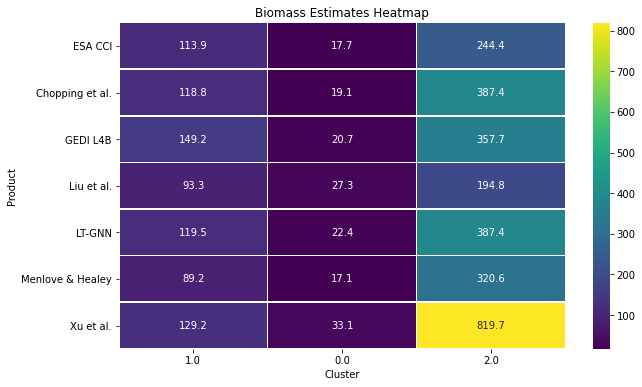

In [98]:
# List of products
products = ['ESA CCI', 'Chopping et al.', 'GEDI L4B', 'Liu et al.', 'LT-GNN', 'Menlove & Healey', 'Xu et al.']

# Create a DataFrame for the heatmap data
heatmap_data = pd.DataFrame(index=products, columns=df['cluster'].unique())

# Fill the DataFrame with biomass estimates
for product in products:
    for cluster in df['cluster'].unique():
        subset = df[df['cluster'] == cluster]
        value = subset[product].mean()  # Taking mean for simplicity, you can use other aggregation methods
        heatmap_data.at[product, cluster] = value

# Convert the values to numeric
heatmap_data = heatmap_data.apply(pd.to_numeric)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
plt.title('Biomass Estimates Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Product')
plt.show()

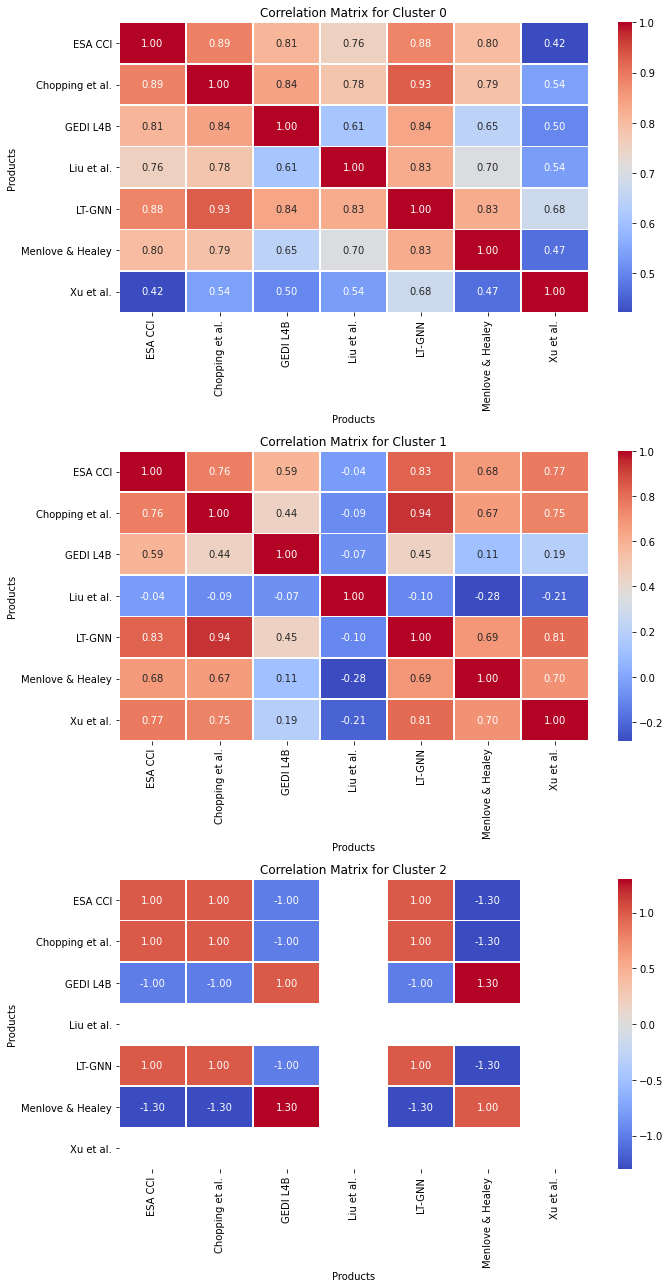

In [99]:
# Create a DataFrame for the heatmap data
heatmap_data = pd.DataFrame(index=products, columns=df['cluster'].unique())

# Group data by cluster
grouped = df.groupby('cluster')

# Create subplots for each cluster
fig, axes = plt.subplots(len(grouped), 1, figsize=(10, 6 * len(grouped)))

# Calculate correlations and plot heatmaps for each cluster
for i, (cluster, data) in enumerate(grouped):
    corr_matrix = data[products].corr()
    sns.heatmap(corr_matrix, ax=axes[i], cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
    axes[i].set_title(f'Correlation Matrix for Cluster {int(cluster)}')
    axes[i].set_xlabel('Products')
    axes[i].set_ylabel('Products')

plt.tight_layout()

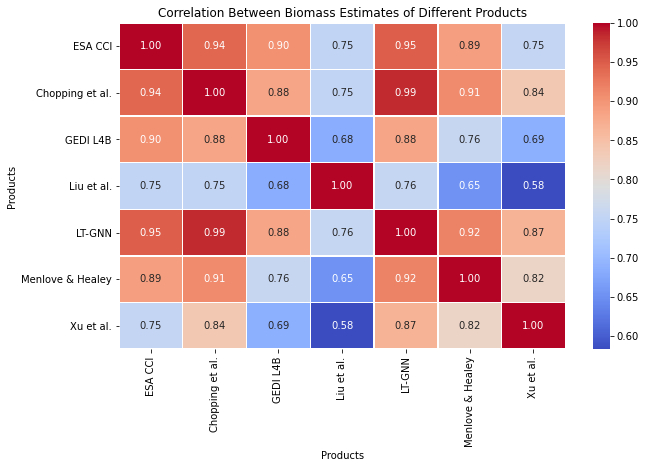

In [100]:
# List of products
products = ['ESA CCI', 'Chopping et al.', 'GEDI L4B', 'Liu et al.', 'LT-GNN', 'Menlove & Healey', 'Xu et al.']

# Create a DataFrame for the heatmap data
heatmap_data = df[products].corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Between Biomass Estimates of Different Products')
plt.xlabel('Products')
plt.ylabel('Products')
plt.show()

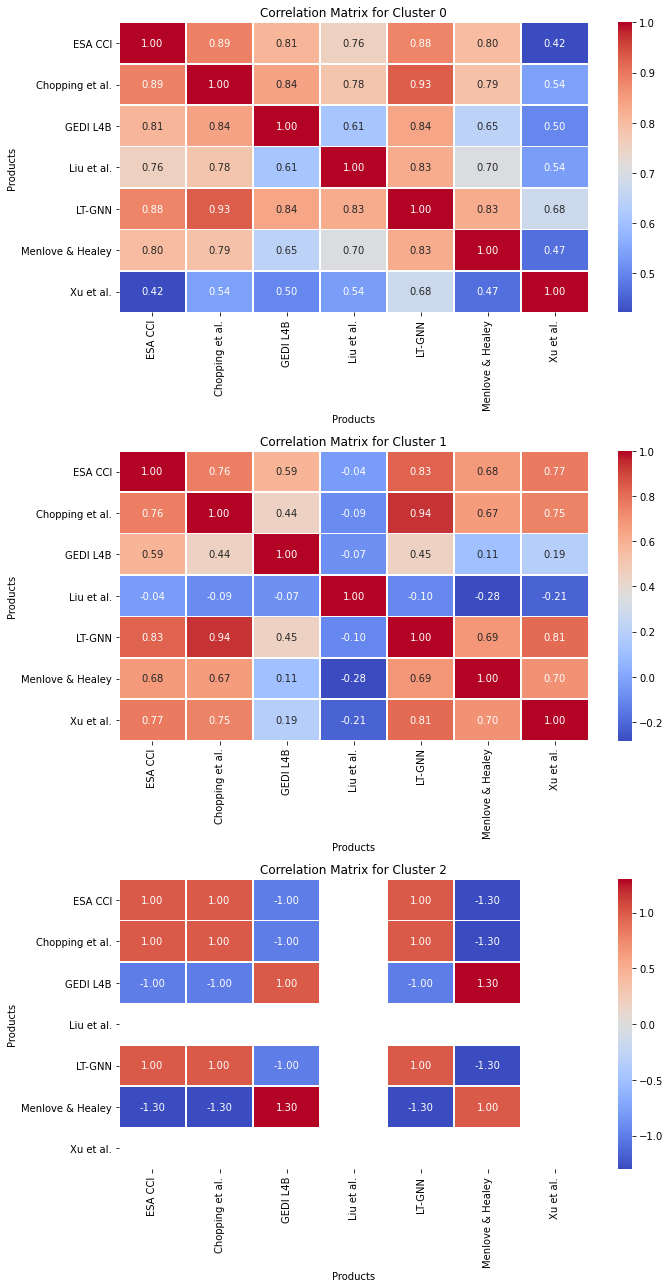

In [101]:
# Group data by cluster
grouped = df.groupby('cluster')

# Create subplots for each cluster
fig, axes = plt.subplots(len(grouped), 1, figsize=(10, 6 * len(grouped)))

# Calculate correlations and plot heatmaps for each cluster
for i, (cluster, data) in enumerate(grouped):
    corr_matrix = data[products].corr()
    sns.heatmap(corr_matrix, ax=axes[i], cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
    axes[i].set_title(f'Correlation Matrix for Cluster {int(cluster)}')
    axes[i].set_xlabel('Products')
    axes[i].set_ylabel('Products')

plt.tight_layout()
plt.show()

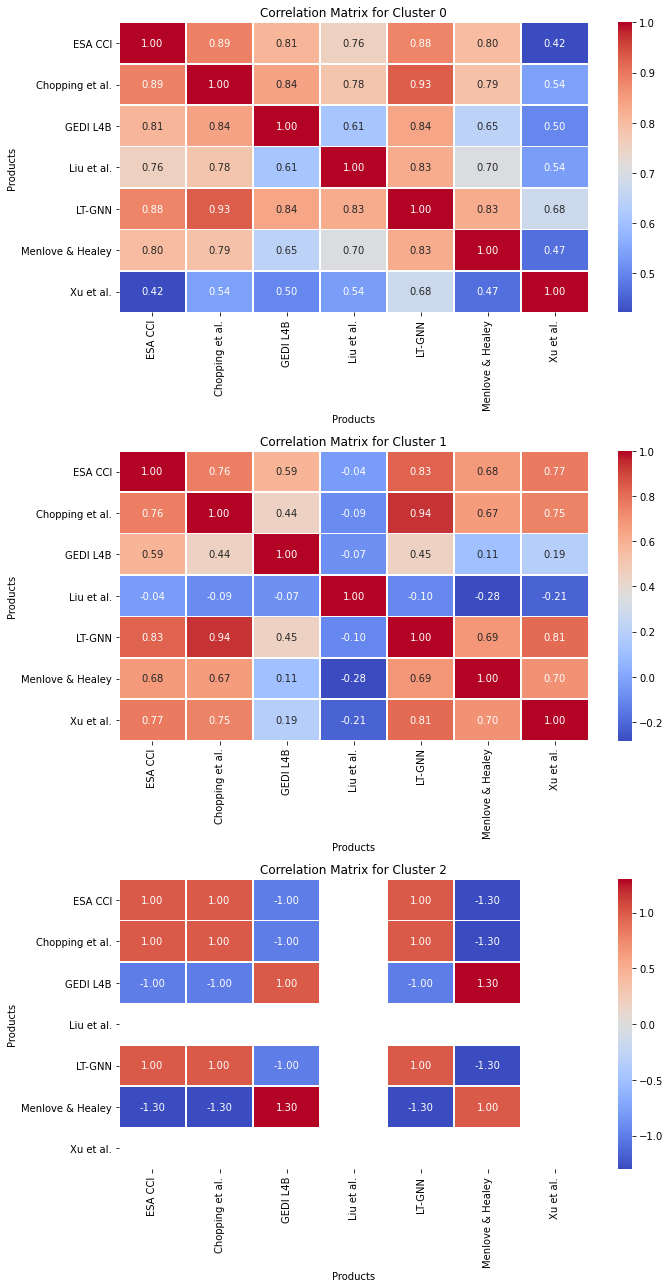

In [102]:
# Group data by cluster (over prods, not locations)

products = ['ESA CCI', 'Chopping et al.', 'GEDI L4B', 'Liu et al.', 'LT-GNN', 'Menlove & Healey', 'Xu et al.']
df = pd.DataFrame(biomass_data_clustered)
grouped = df.groupby('cluster')

# Create subplots for each cluster
fig, axes = plt.subplots(len(grouped), 1, figsize=(10, 6 * len(grouped)))

# Calculate correlations and plot heatmaps for each cluster
for i, (cluster, data) in enumerate(grouped):
    corr_matrix = data[products].corr()
    sns.heatmap(corr_matrix, ax=axes[i], cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
    axes[i].set_title(f'Correlation Matrix for Cluster {int(cluster)}')
    axes[i].set_xlabel('Products')
    axes[i].set_ylabel('Products')

plt.tight_layout()
plt.show()

In [103]:
# Create a dictionary to store the products for each cluster
cluster_products = {}

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    cluster = row['cluster']
    if cluster not in cluster_products:
        cluster_products[cluster] = []

    # Check each product and add it to the cluster if it has a non-NaN value
    for product in products:
        if not pd.isna(row[product]) and product not in cluster_products[cluster]:
            cluster_products[cluster].append(product)

# Create a new DataFrame with the cluster and product information
result_df = pd.DataFrame(columns=['Cluster', 'Products'])

# Iterate over the cluster_products dictionary and add rows to the result DataFrame
for cluster, products in cluster_products.items():
    result_df = result_df.append({'Cluster': int(cluster), 'Products': ', '.join(products)}, ignore_index=True)

# Sort the result DataFrame by cluster
result_df = result_df.sort_values('Cluster')

# Reset the index
result_df = result_df.reset_index(drop=True)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
print(result_df)


  Cluster  \
0       0   
1       1   
2       2   

                                                                              Products  
0  ESA CCI, Chopping et al., GEDI L4B, Liu et al., LT-GNN, Menlove & Healey, Xu et al.  
1  ESA CCI, Chopping et al., GEDI L4B, Liu et al., LT-GNN, Menlove & Healey, Xu et al.  
2  ESA CCI, Chopping et al., GEDI L4B, Liu et al., LT-GNN, Menlove & Healey, Xu et al.  


In [46]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.cluster import contingency_matrix

# Assuming 'data' is your DataFrame with the clustering results
# Replace 'cluster_results.csv' with the path to your clustering results file
# data = pd.read_csv('cluster_results.csv')
data = biomass_data_clustered

# Extract predicted cluster labels
predicted_labels = data['cluster']

# Evaluate clustering performance using Silhouette Coefficient
# The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. 
# Scores around zero indicate overlapping clusters.
# The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster
silhouette_score_value = silhouette_score(data_scaled, predicted_labels)
print(f"Silhouette Coefficient: {silhouette_score_value}")

# Evaluate clustering performance using Calinski-Harabasz Index
# Variance Ratio Criterion - can be used to evaluate the model, 
# where a higher Calinski-Harabasz score relates to a model with better defined clusters
calinski_harabasz_score_value = calinski_harabasz_score(data_scaled, predicted_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz_score_value}")

# Evaluate clustering performance using Davies-Bouldin Index
# This index signifies the average ‘similarity’ between clusters,
# where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.
# Zero is the lowest possible score. Values closer to zero indicate a better partition.
davies_bouldin_score_value = davies_bouldin_score(data_scaled, predicted_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_score_value}")

Silhouette Coefficient: 0.6112335761600729
Calinski-Harabasz Index: 552.8862746952998
Davies-Bouldin Index: 0.47606715797072846
